In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import sympy.printing as printing

In [4]:
def Cardinal(X,j,x):
    pol = 1
    for i in range(len(X)):
        if i != j:
            pol *= (x-X[i])/(X[j]-X[i])
    return pol

In [7]:
def Interpolador(X,Y,x):
    poly = 0
    for i in range(len(X)):
        base = Cardinal(X,i,x)
        poly += base*Y[i]
    return poly

Polinomio interpolador:


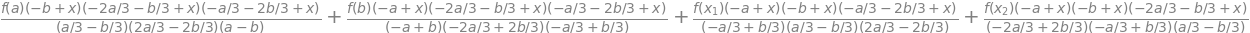

In [64]:
x = sym.Symbol('x')
a = sym.Symbol('a')
b = sym.Symbol('b')
h = sym.Symbol('h')
#x1 = sym.Symbol('x_1')
#x2 = sym.Symbol('x_2')
f_a = sym.Symbol('f(a)')
f_b = sym.Symbol('f(b)')
f_1 = sym.Symbol('f(x_{1})')
f_2 = sym.Symbol('f(x_{2})')
X=np.array([a,(2*a+b)/3,(a+2*b)/3,b])
Y=np.array([f_a,f_1,f_2,f_b])
interpolador = Interpolador(X,Y,x)
print('Polinomio interpolador:')
interpolador

In [65]:
integral = sym.integrate(interpolador,(x,a,b))
integral = sym.simplify(integral)
integral,_ = sym.div(integral,(b-a)/8)
integral = integral*(b-a)/(8)
sym.init_printing()
print('Integral:')
integral

Integral:


Sea $h = \frac{b-a}{3}$, entonces $(b-a) = 3h$.
Por lo tanto, $\int _a^b f(x)dx \simeq \frac{3h}{8}(f(a)+3f(x_1)+3f(x_2)+f(b))$
Como la partición es equiespacial:
$x_1 = a + h = a + \frac{b-a}{3} = \frac{3a+b-a}{3} = \frac{2a+b}{3}$

$x_2 = a + 2h = a + 2\frac{b-a}{3} = \frac{3a+2b-2a}{3} = \frac{a+2b}{3}$

Entonces,
$\int _a^b f(x)dx \simeq \frac{3h}{8}(f(a)+3f(\frac{2a+b}{3})+3f(\frac{a+2b}{3})+f(b))$

El error del polinomio interpolador es:
$E(x) = \frac{f^{(4)}(\zeta)}{4!}(x-a)(x-(a+h))(x-(a+2h))(x-(a+3h))$
Por lo tanto, el error de la regla de simpson tres octavos es:
$E = \int_a^b E(x)dx = \int_a^{a+3h} \frac{f^{(4)}(\zeta)}{4!}(x-a)(x-(a+h))(x-(a+2h))(x-(a+3h))dx$
Bajo el cambio de variable t = x-a, el error se convierte en:
$E = \int_0^{3h} \frac{f^{(4)}(\zeta)}{4!}(t)(t-h)(t-2h)(t-3h)dt$

In [15]:
t= sym.Symbol('t')
h = sym.Symbol('h')
f_zeta = sym.Symbol('f^{(4)}(\zeta)')
E_t = (t)*(t-h)*(t-2*h)*(t-3*h)
E_tot = sym.integrate(E_t,(t,0,3*h))
E_tot *= f_zeta/np.math.factorial(4)
print('El error de la regla de Simpson 3/8 es:')
E_tot

El error de la regla de Simpson 3/8 es:


-3*f^{(4)}(\zeta)*h**5/80